In [1]:
import sys
from collections import defaultdict
from itertools import combinations
from pathlib import Path
import multiprocessing
from typing import Tuple, Union, List

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

from IPython.display import display


project_dir = Path(".").absolute().parent
if project_dir not in set(sys.path):
    sys.path.append(str(project_dir))
import src.utils.custom_log as custom_log
import src.utils.json_util as json_util
from src.utils.Csv import Csv
from src.utils.csv_data_load import load_single_channel

In [2]:
log = custom_log.init_logger(log_lvl=10)

2023-10-25 15:09:54,847 MainProcess  - MainThread      INFO  START || custom_log.py


In [3]:
b_path = Path(r"Q:\Honda_Accord_2014_Sled_with_HIII_Rigid_Seat_SpeedOpt_BigDOE\doe_big_grid_20230922_154140")

In [4]:
log.info("Start")
for path in b_path.glob("V*"):
    if not (path / "channels.csv.zip"):
        log.error("Issue in %s", path)
log.info("Done")

2023-10-25 15:09:54,870 MainProcess  - MainThread      INFO  Start || 545582230.py
2023-10-25 15:09:55,127 MainProcess  - MainThread      INFO  Done || 545582230.py


In [5]:
def load_data(ch_name: str) -> pd.DataFrame:
    log.info("Start")
    
    p_tuples: List[Tuple[Path, str]] = [(x / "channels.csv.zip", ch_name) for x in b_path.glob("V*") if x.is_dir()]
    p_tuples: List[Tuple[Path, str]] = [(x, y) for x, y in p_tuples if x.is_file()]

    with multiprocessing.Pool(processes=8) as p:
        log.info("Run parallel")
        col = p.map(func=load_single_channel, iterable=p_tuples, chunksize=1)
    log.info("Data collected - transform to DataFrame")
    col = [x for x in col if x is not None]

    db = Csv(csv_path=p_tuples[0][0], log=log).read()

    return pd.DataFrame(dict(col), index=db.index)


ch_data = load_data(ch_name="03HEAD0000H395ACRC")
ch_data

2023-10-25 15:09:55,139 MainProcess  - MainThread      INFO  Start || 2180593612.py
2023-10-25 15:09:59,138 MainProcess  - MainThread      INFO  Run parallel || 2180593612.py
2023-10-25 15:28:21,078 MainProcess  - MainThread      INFO  Data collected - transform to DataFrame || 2180593612.py
2023-10-25 15:28:21,084 MainProcess  - MainThread      DEBUG CSV file without suffix is Q:\Honda_Accord_2014_Sled_with_HIII_Rigid_Seat_SpeedOpt_BigDOE\doe_big_grid_20230922_154140\V0000000\channels, Compress True || Csv.py
2023-10-25 15:28:21,088 MainProcess  - MainThread      DEBUG CSV file is Q:\Honda_Accord_2014_Sled_with_HIII_Rigid_Seat_SpeedOpt_BigDOE\doe_big_grid_20230922_154140\V0000000\channels.csv.zip || Csv.py
2023-10-25 15:28:21,092 MainProcess  - MainThread      DEBUG Read Q:\Honda_Accord_2014_Sled_with_HIII_Rigid_Seat_SpeedOpt_BigDOE\doe_big_grid_20230922_154140\V0000000\channels.csv.zip || Csv.py


,V0031250,V0031251,V0031252,V0031253,V0031254,V0031255,V0031256,V0031257,V0031258,V0031259,...,V0046865,V0046866,V0046867,V0046868,V0046869,V0046870,V0046871,V0046872,V0046873,V0046874
TIME,,,,,,,,,,,,,,,,,,,,,
0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0.1,0.104,0.099,0.098,0.097,0.099,0.104,0.099,0.098,0.097,0.099,...,0.103,0.098,0.095,0.096,0.098,0.103,0.098,0.095,0.096,0.098
0.2,0.241,0.230,0.226,0.222,0.222,0.241,0.230,0.226,0.222,0.222,...,0.240,0.228,0.222,0.220,0.222,0.240,0.228,0.222,0.220,0.222
0.3,0.381,0.364,0.357,0.351,0.350,0.381,0.364,0.357,0.351,0.350,...,0.380,0.361,0.352,0.348,0.349,0.380,0.361,0.352,0.348,0.349
0.4,0.522,0.500,0.490,0.481,0.479,0.522,0.500,0.490,0.481,0.479,...,0.520,0.497,0.484,0.478,0.478,0.520,0.497,0.484,0.478,0.478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139.6,24.549,32.830,25.459,30.680,26.387,30.076,26.815,23.061,23.378,25.307,...,11.283,9.525,12.241,13.489,12.498,7.593,11.709,11.526,11.378,10.997
139.7,24.428,32.785,25.374,30.612,25.999,30.180,26.730,22.887,23.300,25.242,...,11.261,9.582,12.205,13.510,12.604,7.725,11.808,11.593,11.417,11.073
139.8,24.292,32.752,25.371,30.543,25.745,30.272,26.688,22.759,23.225,25.205,...,11.251,9.612,12.152,13.506,12.668,7.882,11.891,11.675,11.466,11.149


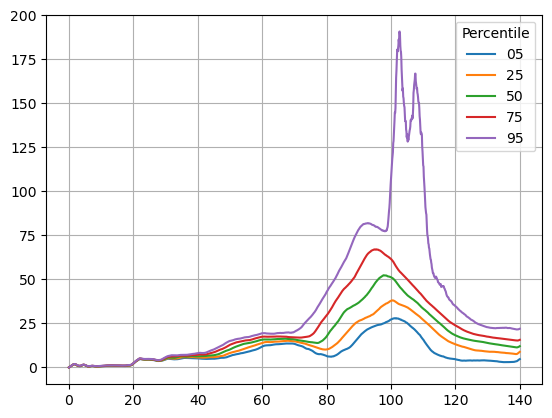

In [6]:
quants = ch_data.T.quantile([0.05,0.25,0.50,0.75,0.95]).T
f, ax = plt.subplots()
for qu in quants.columns:
    ax.plot(quants.index, quants[qu], label=f"{qu*100:02.0f}")
ax.grid()
ax.legend(title="Percentile")

(0.0, 1000.0)

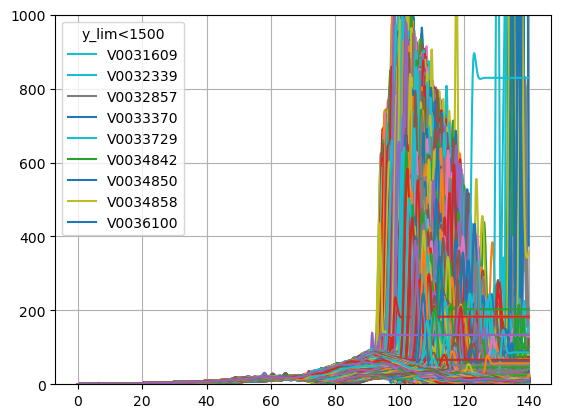

In [20]:
f, ax = plt.subplots()
y_lim = 1500
for c in ch_data.columns:
    if ch_data[c].max() > y_lim:
        ax.plot(ch_data.index, ch_data[c], label=c)
    else:
        ax.plot(ch_data.index, ch_data[c])
ax.grid()
ax.legend(title=f"y_lim<{y_lim}")
ax.set_ylim([0,1000]);

V0031282    393
V0031353    328
V0031857    338
V0031991    295
V0032529    393
V0032858    269
V0033489    384
V0033834    283
V0034435    345
V0034478    471
V0034485    280
V0035087    402
V0036302    359
V0036305    328
V0036313    299
V0037528    330
V0038210    289
V0038230    372
V0038783    427
V0039427    259
V0039453    322
V0039484    465
V0040092    263
V0040705    266
V0041337    264
V0041355    336
V0041908    427
V0042552    259
V0042578    322
V0042609    465
V0044462    257
V0044480    336
V0045033    427
V0045677    259
V0045703    322
V0045734    465
dtype: int64

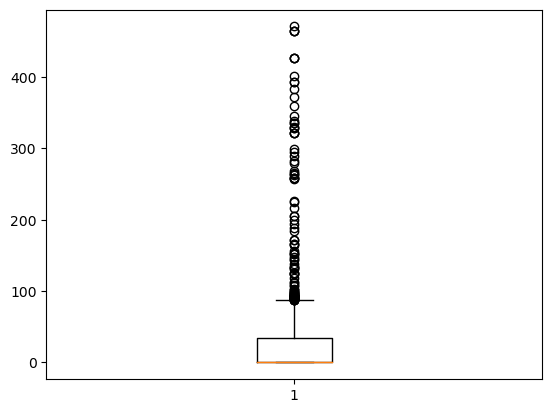

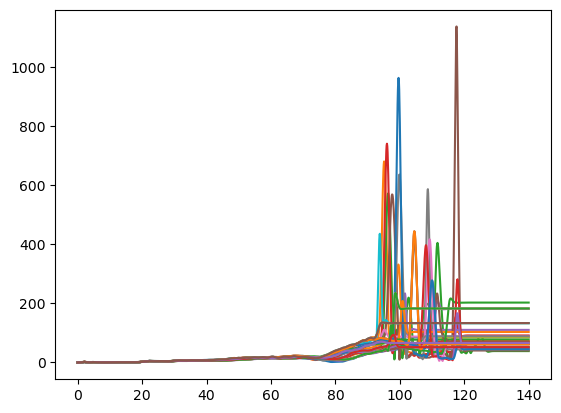

In [93]:
def plot_outlier():
    f1 = ch_data[ch_data.index > 90]
    q1 = f1.quantile(0.25, axis=1)
    q3 = f1.quantile(0.75, axis=1)
    iqr = q3 - q1
    fence_up = q3 + 1.5 * iqr
    fence_lo = q1 - 1.5 * iqr

    is_outlier = f1.gt(fence_up, axis=0)
    n_outliers = is_outlier.sum(axis=0)
    f2 = n_outliers[n_outliers.ge(250)]
    display(f2)

    fig, ax = plt.subplots()
    ax.boxplot(n_outliers)

    fig, ax = plt.subplots()
    for sid in f2.index:
        ax.plot(ch_data.index, ch_data[sid].values)


plot_outlier()